In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 31s 0us/step


In [6]:
data_dir

'./datasets/flower_photos'

In [10]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [11]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/2561371688_c80a4fe957_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8932490012_cc08e690ba_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/8709535323_a6bea3e43f.jpg'),
 PosixPath('datasets/flower_photos/daisy/2479956481_8d1a9699be_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg')]

In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [16]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2273917656_6d6c038283.jpg'),
 PosixPath('datasets/flower_photos/roses/5602220566_5cdde8fa6c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8035910225_125beceb98_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1562198683_8cd8cb5876_n.jpg')]

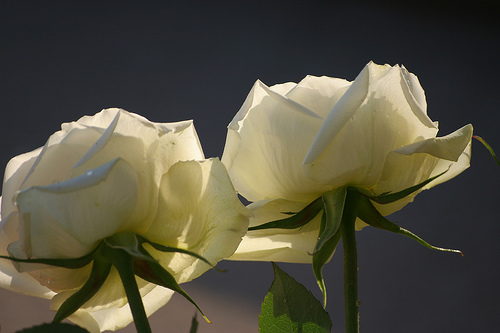

In [17]:
PIL.Image.open(str(roses[1]))

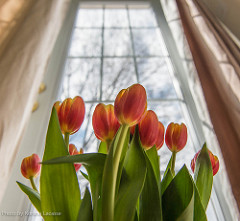

In [18]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [19]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [20]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [21]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2273917656_6d6c038283.jpg'),
 PosixPath('datasets/flower_photos/roses/5602220566_5cdde8fa6c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8035910225_125beceb98_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1562198683_8cd8cb5876_n.jpg')]

In [22]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/8063462557_e0a8bd6c64_n.jpg'

In [23]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [24]:
img.shape

(248, 320, 3)

In [25]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [26]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [27]:
X = np.array(X)
y = np.array(y)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [30]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)              

2023-03-01 11:18:37.718383: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/pavanb/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-03-01 11:18:37.718642: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-01 11:18:37.718665: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (IGN-BLR-LP-0402): /proc/driver/nvidia/version does not exist
2023-03-01 11:18:37.721124: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow wi

Epoch 1/10
86/86 [==============================] - 14s 151ms/step - loss: 1.2990 - accuracy: 0.4582
Epoch 2/10
86/86 [==============================] - 12s 144ms/step - loss: 0.9653 - accuracy: 0.6294
Epoch 3/10
86/86 [==============================] - 12s 142ms/step - loss: 0.7570 - accuracy: 0.7198
Epoch 4/10
86/86 [==============================] - 13s 156ms/step - loss: 0.5585 - accuracy: 0.8016
Epoch 5/10
86/86 [==============================] - 15s 175ms/step - loss: 0.3165 - accuracy: 0.8924
Epoch 6/10
86/86 [==============================] - 13s 152ms/step - loss: 0.1921 - accuracy: 0.9437
Epoch 7/10
86/86 [==============================] - 12s 145ms/step - loss: 0.1210 - accuracy: 0.9648
Epoch 8/10
86/86 [==============================] - 15s 173ms/step - loss: 0.0886 - accuracy: 0.9757
Epoch 9/10
86/86 [==============================] - 24s 279ms/step - loss: 0.0522 - accuracy: 0.9855
Epoch 10/10
86/86 [==============================] - 20s 238ms/step - loss: 0.0259 - accura

In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 43ms/step - loss: 1.8686 - accuracy: 0.6601


[1.8685961961746216, 0.6601307392120361]

In [32]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 43ms/step


array([[ 1.7863271 ,  0.13273585, 10.614369  , -0.976019  , 12.681839  ],
       [ 9.912492  ,  1.181651  , -3.1406682 , -7.4539866 ,  4.6043077 ],
       [-0.09385321,  0.98490375,  6.056117  , -2.5280075 , -1.9214057 ],
       ...,
       [ 2.3524742 , -5.096982  , -2.0065246 , 11.997197  ,  5.728604  ],
       [12.891168  , -0.40508834, -9.330899  , -2.3844128 ,  4.2653785 ],
       [ 4.8241463 ,  2.0545769 , -0.88092804, 11.192939  ,  2.6755457 ]],
      dtype=float32)

In [33]:
score = tf.nn.softmax(predictions[0])

In [36]:
np.argmax(score)

4

In [37]:
y_test[0]

1

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define image dimensions
img_height = 255
img_width = 255

# Create data augmentation sequence
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


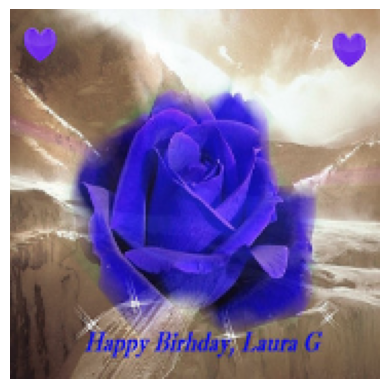

In [43]:
plt.axis('off')
plt.imshow(X[0])

ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 255, 255, 3), found shape=(3670, 180, 180, 3)

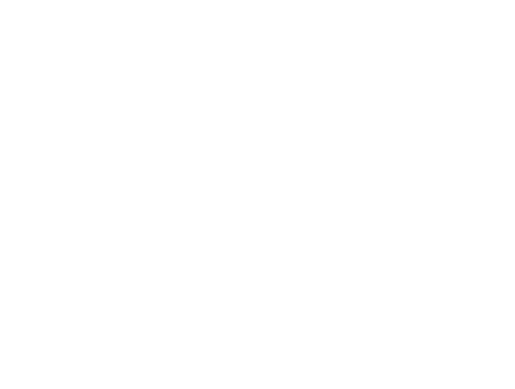

In [44]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))